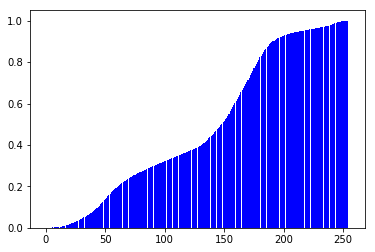

-1

In [13]:
#灰色
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float32)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width

sumCount = float(0)
newCount = np.zeros(256,np.float32)
for i in range(0,255):
    sumCount+=count[i]
    newCount[i]=sumCount
#计算映射表
map1 = np.zeros(256,np.uint16)
for i in range(0,256):
    map1[i] = np.uint16(newCount[i]*255)
#映射
for i in range(0,height):
    for j in range(0,width):
        pixel=gray[i,j]
        gray[i,j] = map1[pixel]
x = np.linspace(0,255,256)#0-255,256等分
y = newCount
plt.bar(x,y,0.9,alpha=1,color='b')
plt.show()
cv2.imshow('dst',gray)
cv2.waitKey(0)

-1

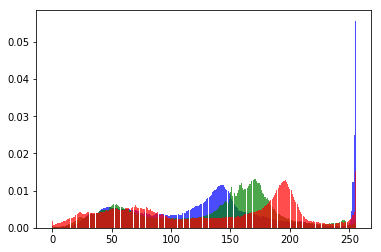

<Figure size 432x288 with 0 Axes>

In [4]:
#彩色
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        index_b=int(b)
        index_g=int(g)
        index_r=int(r)
        count_b[index_b]+=1
        count_g[index_g]+=1
        count_r[index_r]+=1
for i in range(0,256):
    count_b[i]/=height*width
    count_g[i]/=height*width
    count_r[i]/=height*width
    
sumCount_b = float(0)
newCount_b = np.zeros(256,np.float32)
sumCount_g = float(0)
newCount_g = np.zeros(256,np.float32)
sumCount_r = float(0)
newCount_r = np.zeros(256,np.float32)

for i in range(0,255):
    sumCount_b+=count_b[i]
    newCount_b[i]=sumCount_b
    sumCount_g+=count_g[i]
    newCount_g[i]=sumCount_g
    sumCount_r+=count_r[i]
    newCount_r[i]=sumCount_r
    
map_b = np.zeros(256,np.uint16)
map_g = np.zeros(256,np.uint16)
map_r = np.zeros(256,np.uint16)

for i in range(0,256):
    map_b[i] = np.uint16(newCount_b[i]*255)
    map_g[i] = np.uint16(newCount_g[i]*255)
    map_r[i] = np.uint16(newCount_r[i]*255)

dst = np.zeros(img.shape,np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        b =  map_b[b]
        g =  map_g[g]
        r =  map_r[r]
        dst[i,j] = (b,g,r)

x = np.linspace(0,255,256)
y1 = count_b
y2 = count_g
y3 = count_r
plt.bar(x,y1,0.9,alpha=0.7,color='b')
plt.bar(x,y2,0.9,alpha=0.7,color='g')
plt.bar(x,y3,0.9,alpha=0.7,color='r')
plt.figure()

y4 = newCount_b
y5 = newCount_g
y6 = newCount_r
plt.bar(x,y4,0.9,alpha=0.7,color='b')
plt.bar(x,y5,0.9,alpha=0.7,color='g')
plt.bar(x,y6,0.9,alpha=0.7,color='r')

cv2.imshow('dst',dst)
cv2.waitKey(0)